## Import


In [1]:
import time, enum, math
import numpy as np
import pandas as pd
import random
import networkx as nx

import seaborn as sns

# graphical settings
import pylab as plt
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, GeoJSONDataSource, ColorBar, HoverTool, Legend, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer
from bokeh.models.glyphs import Line
from bokeh.palettes import Category10, Viridis
output_notebook()
import panel as pn
import panel.widgets as pnw
pn.extension()

import warnings
warnings.filterwarnings("ignore") 

Loading BokehJS ...

# Network agent based infection model



In [3]:
#sys.path.append('/content/gdrive/My Drive/Tesi LM Data Science/Indagine tamponi/')
from ABmodel import *

#sys.path.append('/content/gdrive/My Drive/Tesi LM Data Science/Indagine tamponi/')
from ABmodel_utils import *

### Test model few steps

In [7]:
model = NetworkInfectionModel(100, num_nodes_Ias=2, num_nodes_Isy=1, num_nodes_Iho=1 )

for i in range(20):

    model.step()



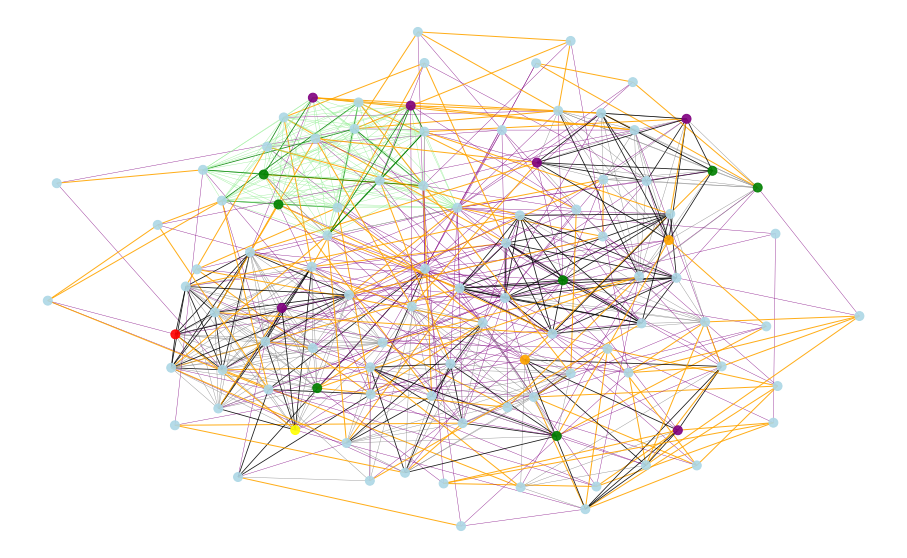

In [8]:
fig,ax=plt.subplots(1,1,figsize=(16,10))
f=plot_grid(model,fig,layout='kamada-kawai')
# plt.savefig(base_dir + 'abm_networkgrid.jpg')

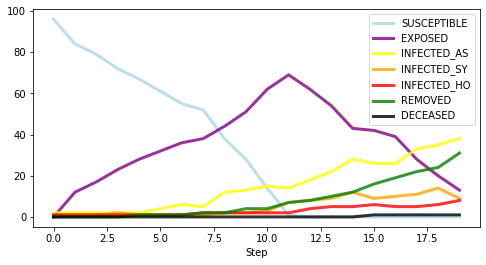

In [ ]:
f,ax=plt.subplots(1,1,figsize=(8,4))
plot_states(model,ax)

In [ ]:
get_column_data(model)

,SUSCEPTIBLE,EXPOSED,INFECTED_AS,INFECTED_SY,INFECTED_HO,REMOVED,DECEASED
Step,,,,,,,
0,96,0,2,1,1,0,0
1,93,3,2,1,1,0,0
2,91,5,2,1,1,0,0
3,87,9,2,1,1,0,0
4,83,13,2,1,1,0,0
5,80,15,2,2,1,0,0
6,74,20,2,2,1,1,0
7,67,26,2,3,1,1,0
8,62,30,3,3,1,1,0


### Run Model simulation

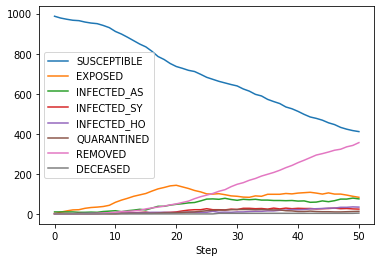

In [8]:
# EXAMPLE: compartement sizes results of simulation

N_abm = 1000
steps = 50
sols = run_model( N_abm, 0, 10, 2, 1, 0,0,0,  steps = steps, output_type = 'Solutions')
sols.plot()

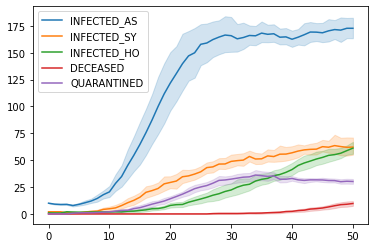

In [93]:
# EXAMPLE: mean compartement sizes with CI of multiple simulation

n_sim = 10
N_abm = 2000
steps = 50
plot_c = ['INFECTED_AS', 'INFECTED_SY', 'INFECTED_HO', 'DECEASED', 'QUARANTINED']


x = dict([(c, []) for c in plot_c])
y = dict([(c, []) for c in plot_c])

for m in range(n_sim):
    sols = run_model( N_abm, 0, 10, 2, 1, 0,0,0,  steps = steps, output_type = 'Solutions')
    
    for c in plot_c:
        x_m = list(range(steps + 1))
        y_m = list(sols[c].values)
        x[c]+=x_m
        y[c]+=y_m
        
        
        
for c in ['INFECTED_AS', 'INFECTED_SY', 'INFECTED_HO', 'DECEASED', 'QUARANTINED']:
    sns.lineplot(x[c], y[c], ci = 95, label = c)

SIMULATION SUMMARY:
Population size :  1500
Reproduction number: min = 0.0, mean = 0.466, max = 24.0
Number of infections: 
  house: 432 (28.86 %)
  work: 126 (8.42 %)
  school: 92 (6.15 %)
  school_class: 30 (2.0 %)
  work_colleague: 194 (12.96 %)
  school_friend: 9 (0.6 %)
  random: 407 (27.19 %)
  other: 207 (13.83 %)
Final size:  99.8 %
Global Generation time:  13.706  steps


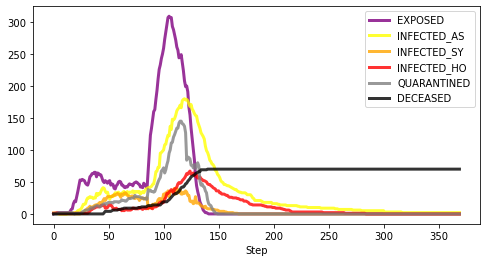

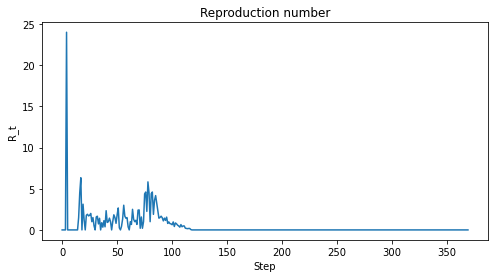

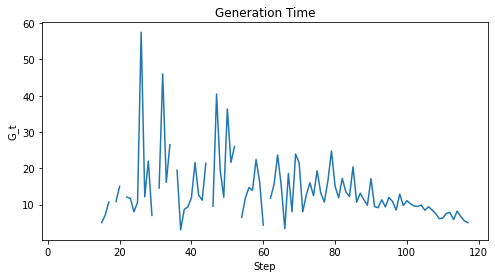

In [60]:
# EXAMPLE: static graphs results of simulation with changing params

N_abm = 1500

# changing points
t = [24, 85, 120, 210, 261, 330]

# new parameters
new_pars = [
    [0.0005, 0.0007, 0.1, 0.003, 0.009, 0.0001, 0.001, 0.003,
     0.0005, 0.0007, 0.1, 0.003, 0.009, 0.0001, 0.001, 0.003, 
     0.005, 0.002, 0.23, 0.40, 14, 1/0.73, 1/0.05,1/0.9, 1/0.03],
    [0.01, 0.02, 0.1, 0.03, 0.12, 0.0001, 0.001, 0.003,
     0.01, 0.02, 0.1, 0.03, 0.12, 0.0001, 0.001, 0.003,
     0.0002, 0.0001, 0.21, 0.48, 14, 1/0.54, 1/0.09,1/0.58, 1/0.65],
    [0.01, 0.02, 0.1, 0.03, 0.12, 0.05, 0.08, 0.15,
     0.01, 0.02, 0.1, 0.03, 0.12, 0.05, 0.08, 0.15,
     0.0002, 0.0001, 0.31, 0.52, 10, 1/0.55, 1/0.31,1/0.66, 1/0.66],
    [0.005, 0.007, 0.1, 0.005, 0.01, 0.008, 0.001, 0.003,
     0.005, 0.007, 0.1, 0.005, 0.01, 0.008, 0.001, 0.003,
     0.0002, 0.0001, 0.18, 0.58, 10, 1/0.36, 1/0.08,1/0.61, 1/0.76],
    [0.005, 0.007, 0.1, 0.005, 0.01, 0.008, 0.001, 0.003,
     0.005, 0.007, 0.1, 0.005, 0.01, 0.008, 0.001, 0.003,
     0.0002, 0.0001, 0.34, 0.42, 10, 1/0.50, 1/0.05,1/0.61, 1/0.59],
    [0.005, 0.007, 0.1, 0.005, 0.01, 0.008, 0.001, 0.003,
     0.005, 0.007, 0.1, 0.005, 0.01, 0.008, 0.001, 0.003,
     0.0002, 0.0001, 0.47, 0.62, 10, 1/0.54, 1/0.18,1/0.72, 1/0.28]
    
]


run_model( N_abm, 0, 1, 1, 1, 0,0,0,  steps = 369, 
          change_times = t, change_pars = new_pars,
          output_type = 'Static', drop_S_R = True)


In [ ]:
# EXAMPLE: animated simulation

grid_pane = pn.pane.Matplotlib()
states_pane = pn.pane.Matplotlib()

go_btn = pnw.Button(name='run',width=100,button_type='primary')

pop_input = pnw.IntSlider(name='population',value=100,start=50,end=250,step=10,width=100)
steps_input = pnw.IntSlider(name='steps',value=20,start=5,end=100,width=100)
delay_input = pnw.FloatSlider(name='delay',value=0,start=0,end=3,step=.2,width=100)
layout_input = pnw.Select(name='layout',options=['kamada-kawai','spring','circular'],width=100)

widgets = pn.WidgetBox(go_btn,pop_input,steps_input,delay_input,layout_input)



def execute(event):
    
        num_nodes = pop_input.value
    
        model = NetworkInfectionModel(num_nodes, 0, 2, 1, 1, 0, 0, 0)

        fig1 = plt.Figure(figsize=(8,6))
        #ax1=fig1.add_subplot(1,1,1,label='a')
        grid_pane.object = fig1
        fig2 = plt.Figure(figsize=(8,6))
        ax2=fig2.add_subplot(1,1,1,label='b')
        states_pane.object = fig2 
        
        steps = steps_input.value
        delay = delay_input.value
        layout = layout_input.value

        for i in range(steps+1):
            model.step()
            plot_grid(model,fig1,title='step=%s' %i, layout=layout)        
            grid_pane.param.trigger('object')
            ax2.clear()
            plot_states(model,ax2)
            ax2.set_xlim(0,steps)
            #states_pane.object = fig2
            states_pane.param.trigger('object')    
            time.sleep(delay)
        #plt.clf()


go_btn.param.watch(execute, 'clicks')

 
pn.Row(pn.Column(widgets),grid_pane,states_pane,sizing_mode='stretch_both')

Row(sizing_mode='stretch_both')
    [0] Column
        [0] WidgetBox
            [0] Button(button_type='primary', name='run', width=100)
            [1] IntSlider(end=250, name='population', start=50, step=10, value=100, value_throttled=100, width=100)
            [2] IntSlider(end=100, name='steps', start=5, value=20, value_throttled=20, width=100)
            [3] FloatSlider(end=3, name='delay', step=0.2, value_throttled=0, width=100)
            [4] Select(name='layout', options=['kamada-kawai', ...], value='kamada-kawai', width=100)
    [1] Matplotlib(None)
    [2] Matplotlib(None)

# Deterministic model


In [3]:
from DETmodel import main

In [230]:
beta_as, beta_sy, beta_ho, beta_quar  = 3/14, 6/14, 1/100, 1/100 # virus transmission rate

epsilon = 1/5 # latent rate

gamma_as, gamma_sy, gamma_ho, gamma_quar = 1/18, 1/18, 1/26, 1/14 # recovery rate

phi_as, phi_sy = 1/5, 1/3 # quarantining rate

psi = 1/10 # hospitalization rate

mu = 1/12 # death rate

p_as, p_sy = 0.645, 0.355 # prob to be I asymptomatic VS symptomatic

pquar_as = 0.6 # prob to be quarantined when I asymptomatic 

p_ho = 0.223 # prob to be I hospitalized symptomatic

pdie_sy = 0.024 # prob to die when I symptomatic not hospitalized

pquar_sy = 0.6 # prob to be quarantined but not hosp when I symptomatic (p_ho + pdie_sy + pquar_sy < 1)

pdie_ho = 0.271 # prob to die when I hospitalized symptomatic  


In [231]:
initE = 0 
initIas = 1 
initIsy = 1
initIho = 0
initQ = 0
initR = 0
initD = 0
initN = 4900000

days = 400

# EXAMPLE: compartement sizes of deterministic model solutions (LAST DAY)

num_S, num_E, num_Ias, num_Isy, num_Iho, num_R, num_Q, num_D = main(initE, initIas, initIsy, initIho, initQ, initR, initD, initN, 
         beta_as, beta_sy, beta_ho, beta_quar, epsilon, gamma_as, gamma_sy, gamma_ho, gamma_quar, phi_as, phi_sy, psi, mu,
         days, 
         p_sy, p_ho, pdie_sy, pdie_ho, pquar_as, pquar_sy, 
         output = 'Last')

In [ ]:
num_S, num_E, num_Ias, num_Isy, num_Iho, num_R, num_Q, num_D

(1405073.5681874962,
 518.5064367324319,
 689.7812746042769,
 196.9084583950912,
 42.67093660036198,
 4728.655530777308,
 3482517.760111405,
 6232.1490639812355)

<AxesSubplot:xlabel='days', ylabel='cases'>

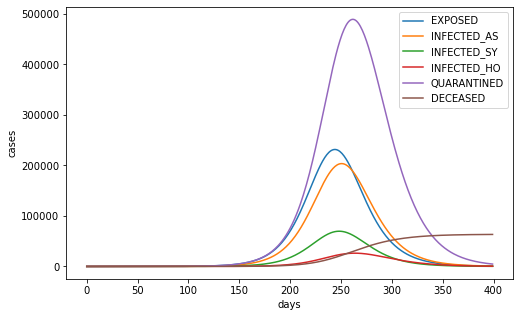

In [232]:
# EXAMPLE: compartement sizes of deterministic model solutions (ALL DAYS)

solutiondf = main(initE, initIas, initIsy, initIho, initQ, initR, initD, initN, 
         beta_as, beta_sy, beta_ho, beta_quar, epsilon, gamma_as, gamma_sy, gamma_ho, gamma_quar, phi_as, phi_sy, psi, mu,
         days, 
         p_sy, p_ho, pdie_sy, pdie_ho, pquar_as, pquar_sy, 
         output = 'Solutions')
                  
solutiondf = solutiondf[['EXPOSED', 'INFECTED_AS', 'INFECTED_SY', 'INFECTED_HO','QUARANTINED','DECEASED']]
solutiondf.plot(xlabel = 'days', ylabel = 'cases', figsize=(8,5))


In [ ]:
# EXAMPLE: interactive graph of deterministic model solutions

# ref: https://www.medrxiv.org/content/10.1101/2020.04.01.20049825v1.full.pdf


# Jupyter graphical specifics
#import pio
#pio.renderers.default = "notebook"
%matplotlib inline
plt.style.use('ggplot')
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout, Select
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

# set parameters default
initN = 4900000
initE = 0
initIas = 1
initIsy = 1
initIho = 1
initQ = 0
initR = 0
initD = 0

beta_as, beta_sy, beta_ho, beta_quar  = 3/14, 6/14, 1/100, 1/100 # virus transmission rate

epsilon = 1/5 # latent rate

gamma_as, gamma_sy, gamma_ho, gamma_quar = 1/18, 1/18, 1/26, 1/14 # recovery rate

phi_as, phi_sy = 1/5, 1/3 # quarantining rate

psi = 1/10 # hospitalization rate

mu = 1/12 # death rate

p_as, p_sy = 0.645, 0.355 # prob to be I asymptomatic VS symptomatic

p_ho = 0.223 # prob to be I hospitalized symptomatic

pdie_sy = 0.024 # prob to die when I symptomatic not hospitalized

pdie_ho = 0.271 # prob to die when I hospitalized symptomatic  

pquar_as, pquar_sy = 0.6, 0.9 # prob to be quarantined when I asymptomatic VS symptomatic

interact(main, 
         
         initE=IntSlider(min=0, max=100000, step=1, value=initE, description='initial E', style=style, layout=slider_layout),
         initIas=IntSlider(min=0, max=100000, step=10, value=initIas, description='initial Ias', style=style, layout=slider_layout),
         initIsy=IntSlider(min=0, max=100000, step=10, value=initIsy, description='initial Isy', style=style, layout=slider_layout),
         initIho=IntSlider(min=0, max=100000, step=10, value=initIho, description='initial Iho', style=style, layout=slider_layout),
         initQ=IntSlider(min=0, max=100000, step=10, value=initQ, description='initial Q', style=style, layout=slider_layout),
         initR=IntSlider(min=0, max=100000, step=10, value=initR, description='initial R', style=style, layout=slider_layout),
         initD=IntSlider(min=0, max=100000, step=10, value=initD, description='initial D', style=style, layout=slider_layout),
         initN=IntSlider(min=0, max=6000000, step=1000, value=initN, description='initial N', style=style, layout=slider_layout),
         
         beta_as=FloatSlider(min=0, max=4, step=0.01, value=beta_as, description='Infection rate Ias', style=style, layout=slider_layout),
         beta_sy=FloatSlider(min=0, max=4, step=0.01, value=beta_sy, description='Infection rate Isy', style=style, layout=slider_layout),
         beta_ho=FloatSlider(min=0, max=4, step=0.01, value=beta_ho, description='Infection rate Iho', style=style, layout=slider_layout),
         beta_quar=FloatSlider(min=0, max=4, step=0.01, value=beta_quar, description='Infection rate Q', style=style, layout=slider_layout),
         
         epsilon=FloatSlider(min=0, max=1, step=0.01, value=epsilon, description='Incubation rate', style=style, layout=slider_layout),
         
         gamma_as=FloatSlider(min=0, max=1, step=0.01, value=gamma_as, description='Recovery rate Ias', style=style, layout=slider_layout),
         gamma_sy=FloatSlider(min=0, max=1, step=0.01, value=gamma_sy, description='Recovery rate Isy', style=style, layout=slider_layout),
         gamma_ho=FloatSlider(min=0, max=1, step=0.01, value=gamma_ho, description='Recovery rate Iho', style=style, layout=slider_layout),
         gamma_quar=FloatSlider(min=0, max=1, step=0.01, value=gamma_quar, description='Recovery rate Q', style=style, layout=slider_layout),
         
         phi_as = FloatSlider(min=0, max=1, step=0.01, value=phi_as, description='Quarantine rate Ias', style=style, layout=slider_layout),
         phi_sy = FloatSlider(min=0, max=1, step=0.01, value=phi_sy, description='Quarantine rate Isy', style=style, layout=slider_layout),
         
         psi = FloatSlider(min=0, max=1, step=0.01, value=psi, description='Hospitalization rate', style=style, layout=slider_layout),
         
         mu=FloatSlider(min=0, max=1, step=0.01, value=mu, description='Mortality rate', style=style, layout=slider_layout),
         
         days=IntSlider(min=1, max=600, step=7, value=days, description='Days', style=style, layout=slider_layout),
         
         p_sy=FloatSlider(min=0, max=1, step=0.01, value=p_sy, description='Prob. Syntomatic', style=style, layout=slider_layout),
         p_ho=FloatSlider(min=0, max=1, step=0.01, value=p_ho, description='Prob. Hospitalized', style=style, layout=slider_layout),
         
         pdie_sy=FloatSlider(min=0, max=1, step=0.01, value=pdie_sy, description='Prob. Deceased Isy', style=style, layout=slider_layout),
         pdie_ho=FloatSlider(min=0, max=1, step=0.01, value=pdie_ho, description='Prob. Deceased Iho', style=style, layout=slider_layout),
         
         pquar_as=FloatSlider(min=0, max=1, step=0.01, value=pquar_as, description='Prob. Quarantined Ias', style=style, layout=slider_layout),
         pquar_sy=FloatSlider(min=0, max=1, step=0.01, value=pquar_sy, description='Prob. Quarantined Isy', style=style, layout=slider_layout),
         
         output = 'Figure'
        );



interactive(children=(IntSlider(value=0, description='initial E', layout=Layout(width='99%'), max=100000, styl…